In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,NaN,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0
2,8.0,NaN,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,NaN,66.0,23.0,94.0,NaN,0.167,NaN
4,0.0,NaN,40.0,35.0,NaN,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,NaN,76.0,NaN,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,NaN,0.340,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	114
float64		column 2	228
float64		column 3	152
float64		column 4	76
float64		column 5	190
float64		column 6	228
float64		column 7	114
float64		column 8	114


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,654.000000,540.000000,616.000000,692.000000,578.000000,540.000000,654.000000,654.000000
mean,3.752294,119.218519,69.129870,20.478324,74.423875,32.112037,0.466237,33.065749
std,3.261890,28.151993,18.218797,15.753376,105.324218,6.823569,0.314499,11.311825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.600000,0.249000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,41.500000,32.000000,0.379000,29.000000
75%,6.000000,135.000000,78.000000,32.000000,119.750000,35.900000,0.604000,40.000000
max,17.000000,196.000000,114.000000,99.000000,744.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

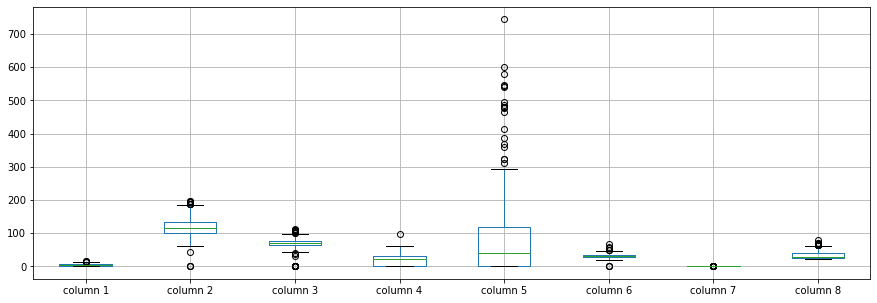

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.752294
column 2    119.218519
column 3     69.129870
column 4     20.478324
column 5     74.423875
column 6     32.112037
column 7      0.466237
column 8     33.065749
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.123209,0.116848,-0.071782,-0.084274,-0.028923,-0.008768,0.488296
column 2,0.123209,1.000000,0.166636,0.056299,0.280794,0.193286,0.071190,0.213930
column 3,0.116848,0.166636,1.000000,0.191301,0.087359,0.267975,0.059839,0.208576
column 4,-0.071782,0.056299,0.191301,1.000000,0.418521,0.406857,0.181963,-0.120023
column 5,-0.084274,0.280794,0.087359,0.418521,1.000000,0.195000,0.258012,-0.092530
column 6,-0.028923,0.193286,0.267975,0.406857,0.195000,1.000000,0.174653,0.062201
column 7,-0.008768,0.071190,0.059839,0.181963,0.258012,0.174653,1.000000,0.034313
column 8,0.488296,0.213930,0.208576,-0.120023,-0.092530,0.062201,0.034313,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+66,8+66+66,8+66+66+66,8+66+66+66+66,8+66+66+66+66+66,8+66+66+66+66+66+66,8+66+66+66+66+66,8+66+66+66+66,8+66+66+66,8+66+66,8+66,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 315.39168643951416
Epoch: 1 , loss: 313.29738330841064
Epoch: 2 , loss: 312.27781168619794
Epoch: 3 , loss: 309.1369400024414
Epoch: 4 , loss: 307.5621563593547
Epoch: 5 , loss: 305.52738189697266
Epoch: 6 , loss: 305.2709560394287
Epoch: 7 , loss: 300.83752727508545
Epoch: 8 , loss: 296.8131675720215
Epoch: 9 , loss: 292.92268053690594
Epoch: 10 , loss: 291.7754151026408
Epoch: 11 , loss: 285.1895583470662
Epoch: 12 , loss: 283.62853304545087
Epoch: 13 , loss: 278.15775775909424
Epoch: 14 , loss: 273.187801361084
Epoch: 15 , loss: 270.6939484278361
Epoch: 16 , loss: 257.7332639694214
Epoch: 17 , loss: 260.37894948323566
Epoch: 18 , loss: 252.5633757909139
Epoch: 19 , loss: 251.20663579305014
Epoch: 20 , loss: 244.46383253733316
Epoch: 21 , loss: 243.68306732177734
Epoch: 22 , loss: 236.33964411417642
Epoch: 23 , loss: 233.22473875681558
Epoch: 24 , loss: 231.64506181081137
Epoch: 25 , loss: 228.9996439

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    65.856697
column 3    41.533695
column 4    12.751579
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.0,0.000000,0.000000,-20.841204,0.0,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,2.731423,0.0,0.000000
2,0.0,-122.765190,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,-31.978355,0.0,0.000000,0.000000,-11.274383,0.0,-4.371449
4,0.0,17.925354,0.0,0.000000,-74.391365,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.0,-100.525593,0.0,-47.586544,0.000000,0.000000,0.0,0.000000
764,0.0,0.000000,0.0,0.000000,0.000000,0.348113,0.0,10.732059
765,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
766,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2588.1063835233736, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.44803466136939263

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     44.276245
column 4     30.000000
column 5      0.000000
column 6     32.500000
column 7      0.375490
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.000000,72.0,35.000000,0.000000,12.758796,0.627,50.000000
1,1.0,85.000000,66.0,29.000000,0.000000,29.331423,0.351,31.000000
2,8.0,60.234810,64.0,0.000000,0.000000,23.300000,0.672,32.000000
3,1.0,57.021645,66.0,23.000000,94.000000,16.825617,0.167,16.628551
4,0.0,154.925354,40.0,35.000000,93.608635,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.0,0.474407,76.0,0.413456,180.000000,32.900000,0.171,63.000000
764,2.0,122.000000,70.0,27.000000,0.000000,37.148113,0.340,37.732059
765,5.0,121.000000,72.0,23.000000,112.000000,26.200000,0.245,30.000000
766,1.0,126.000000,60.0,0.000000,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_NN_20.xlsx", index=False, header=False)